In [1]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
# get training testing data
df_processed = pd.read_csv("../processed_data/level2_processed_data.csv")
x = ["eth_friction_diff_1.0", "btc_friction_diff_1.0", "eth_close_15_min_past_percent_change"]
y = ["btc_close_15_min_future_percent_change"]
df = df_processed[y + x].dropna()
x_df = df[x]
y_df = df[y]
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,
                                   random_state=100, 
                                   test_size=0.2, 
                                   shuffle=True)

In [10]:
# train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# get error
y_hat = model.predict(x_train)
print(f"train mse: {mean_squared_error(y_hat, y_train)}")

y_hat = model.predict(x_test)
print(f"test mse {mean_squared_error(y_hat, y_test)}")

train mse: 8.795092969918788e-06
test mse 1.3473289801601498e-05


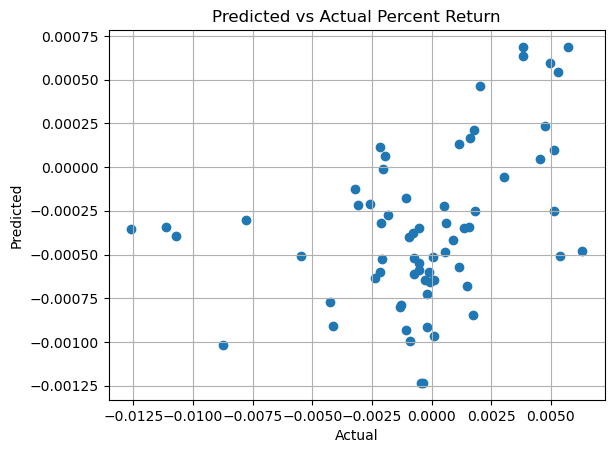

In [17]:
# plot test predictions vs actual
y_hat = model.predict(x_test)
plt.scatter(y_test, y_hat)
plt.title("Predicted vs Actual Percent Return")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid()